In [3]:
!pip install -U imbalanced-learn

In [19]:
import pandas as pd

In [105]:
#임의의 불균형 데이터 생성. 10000건의 데이터를 1:9 비율로 생성
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=2, n_informative=1,
                           n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,
                           weights=[0.1, 0.9],
                           random_state=13)

from collections import Counter
print(sorted(Counter(y).items()))

[(0, 1023), (1, 8977)]


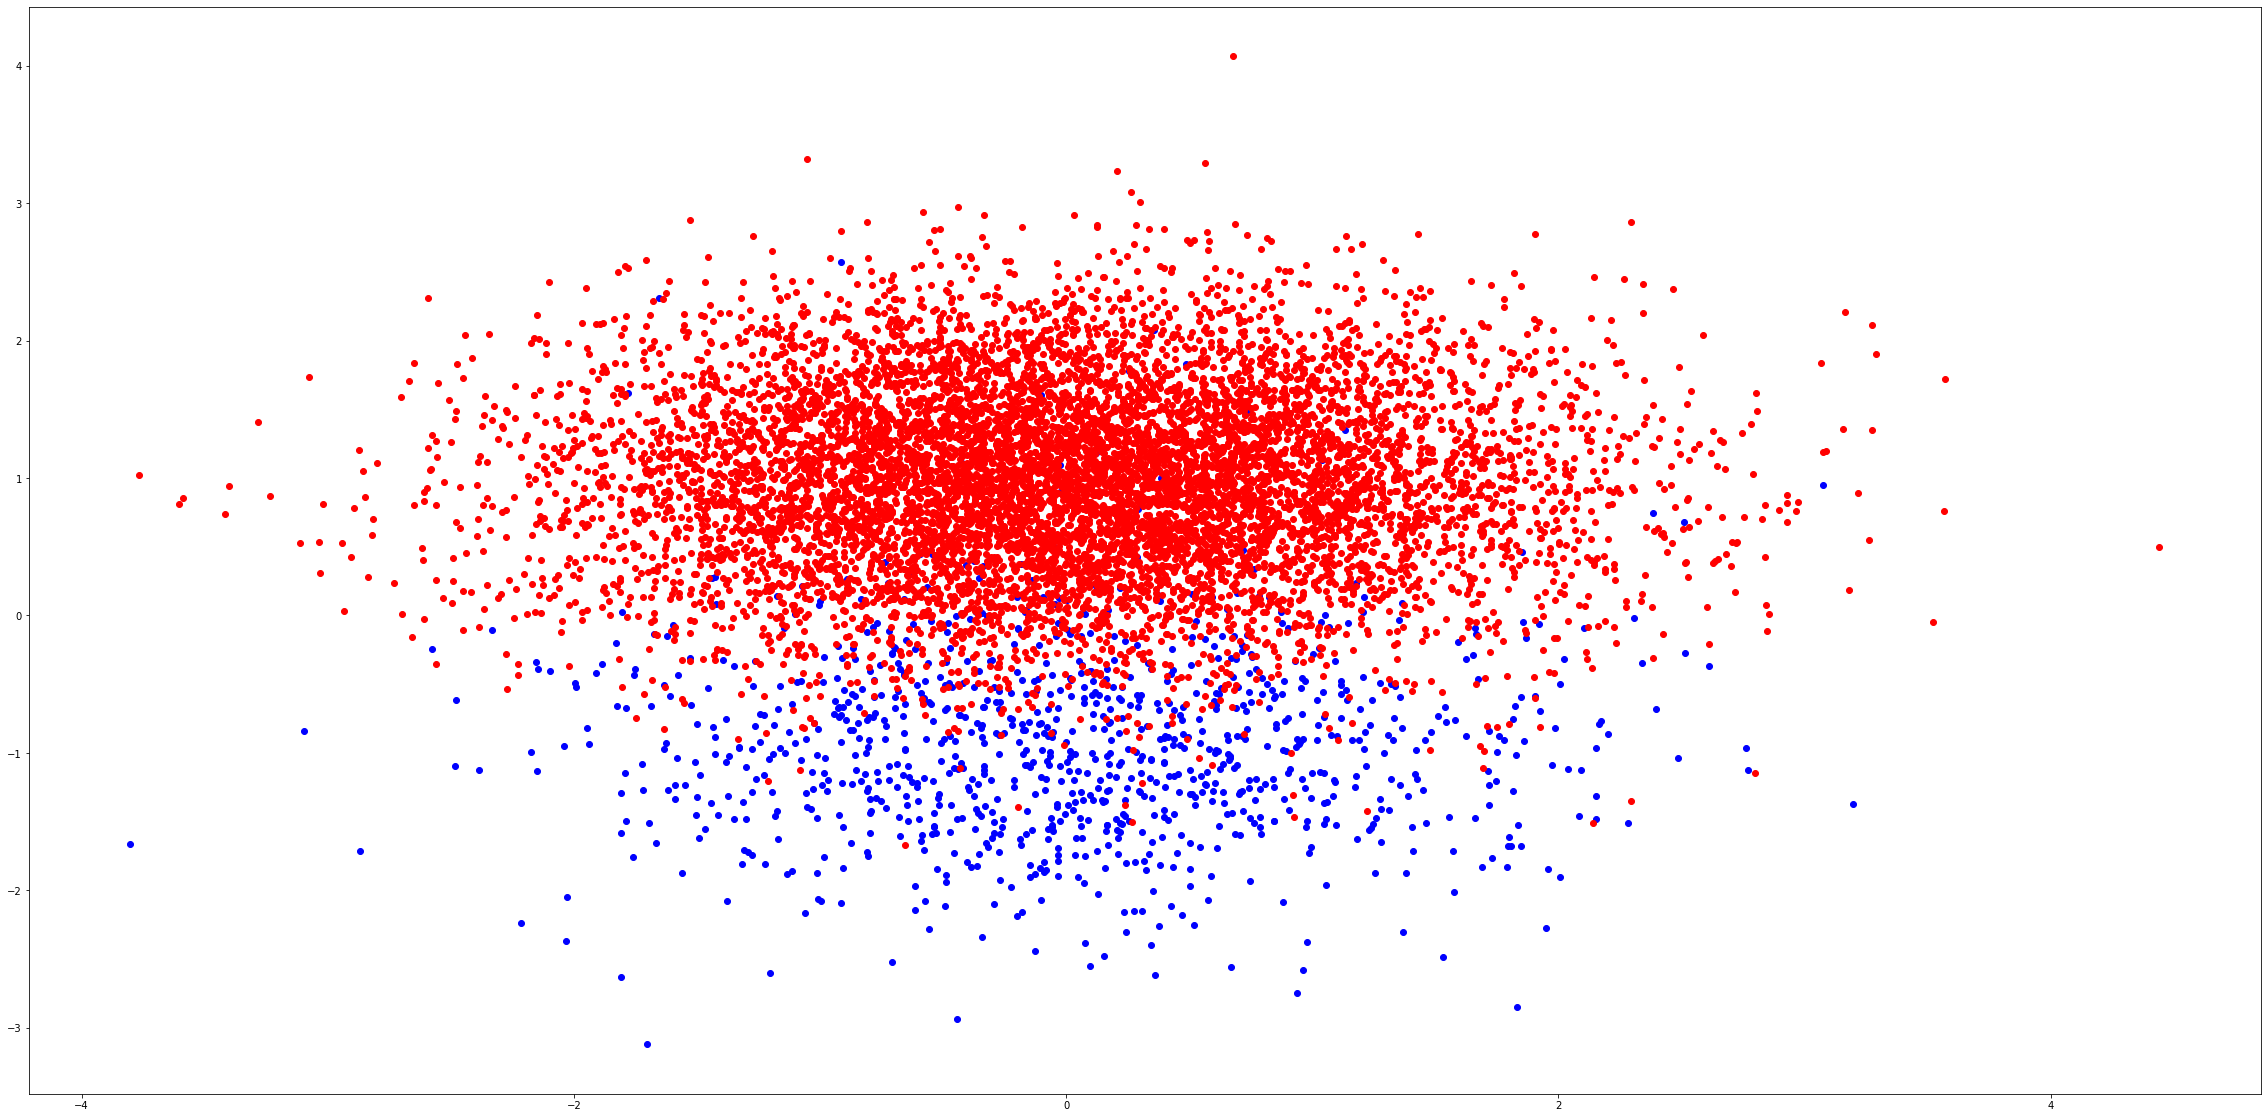

In [106]:
#불균형 데이터를 클래스별로 분류하여 그래프 생성
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(40, 20))
cur_x0_cord=[]
cur_y0_cord=[]
cur_x1_cord=[]
cur_y1_cord=[]

color_hash={}

def seperate(cur_x0_cord, cur_x1_cord, cur_y0_cord, cur_y1_cord, X, y):
  for i in range(len(X)):
    if y[i] == 0:
      cur_x0_cord.append(X[i][0])
      cur_y0_cord.append(X[i][1])
    elif y[i] == 1:
      cur_x1_cord.append(X[i][0])
      cur_y1_cord.append(X[i][1])
seperate(cur_x0_cord, cur_x1_cord, cur_y0_cord, cur_y1_cord, X, y)

plt.scatter(cur_x0_cord, cur_y0_cord, c='b')
plt.scatter(cur_x1_cord, cur_y1_cord, c='r')




[(0, 8977), (1, 8977)]
border item count:  6935
0 class:  8977


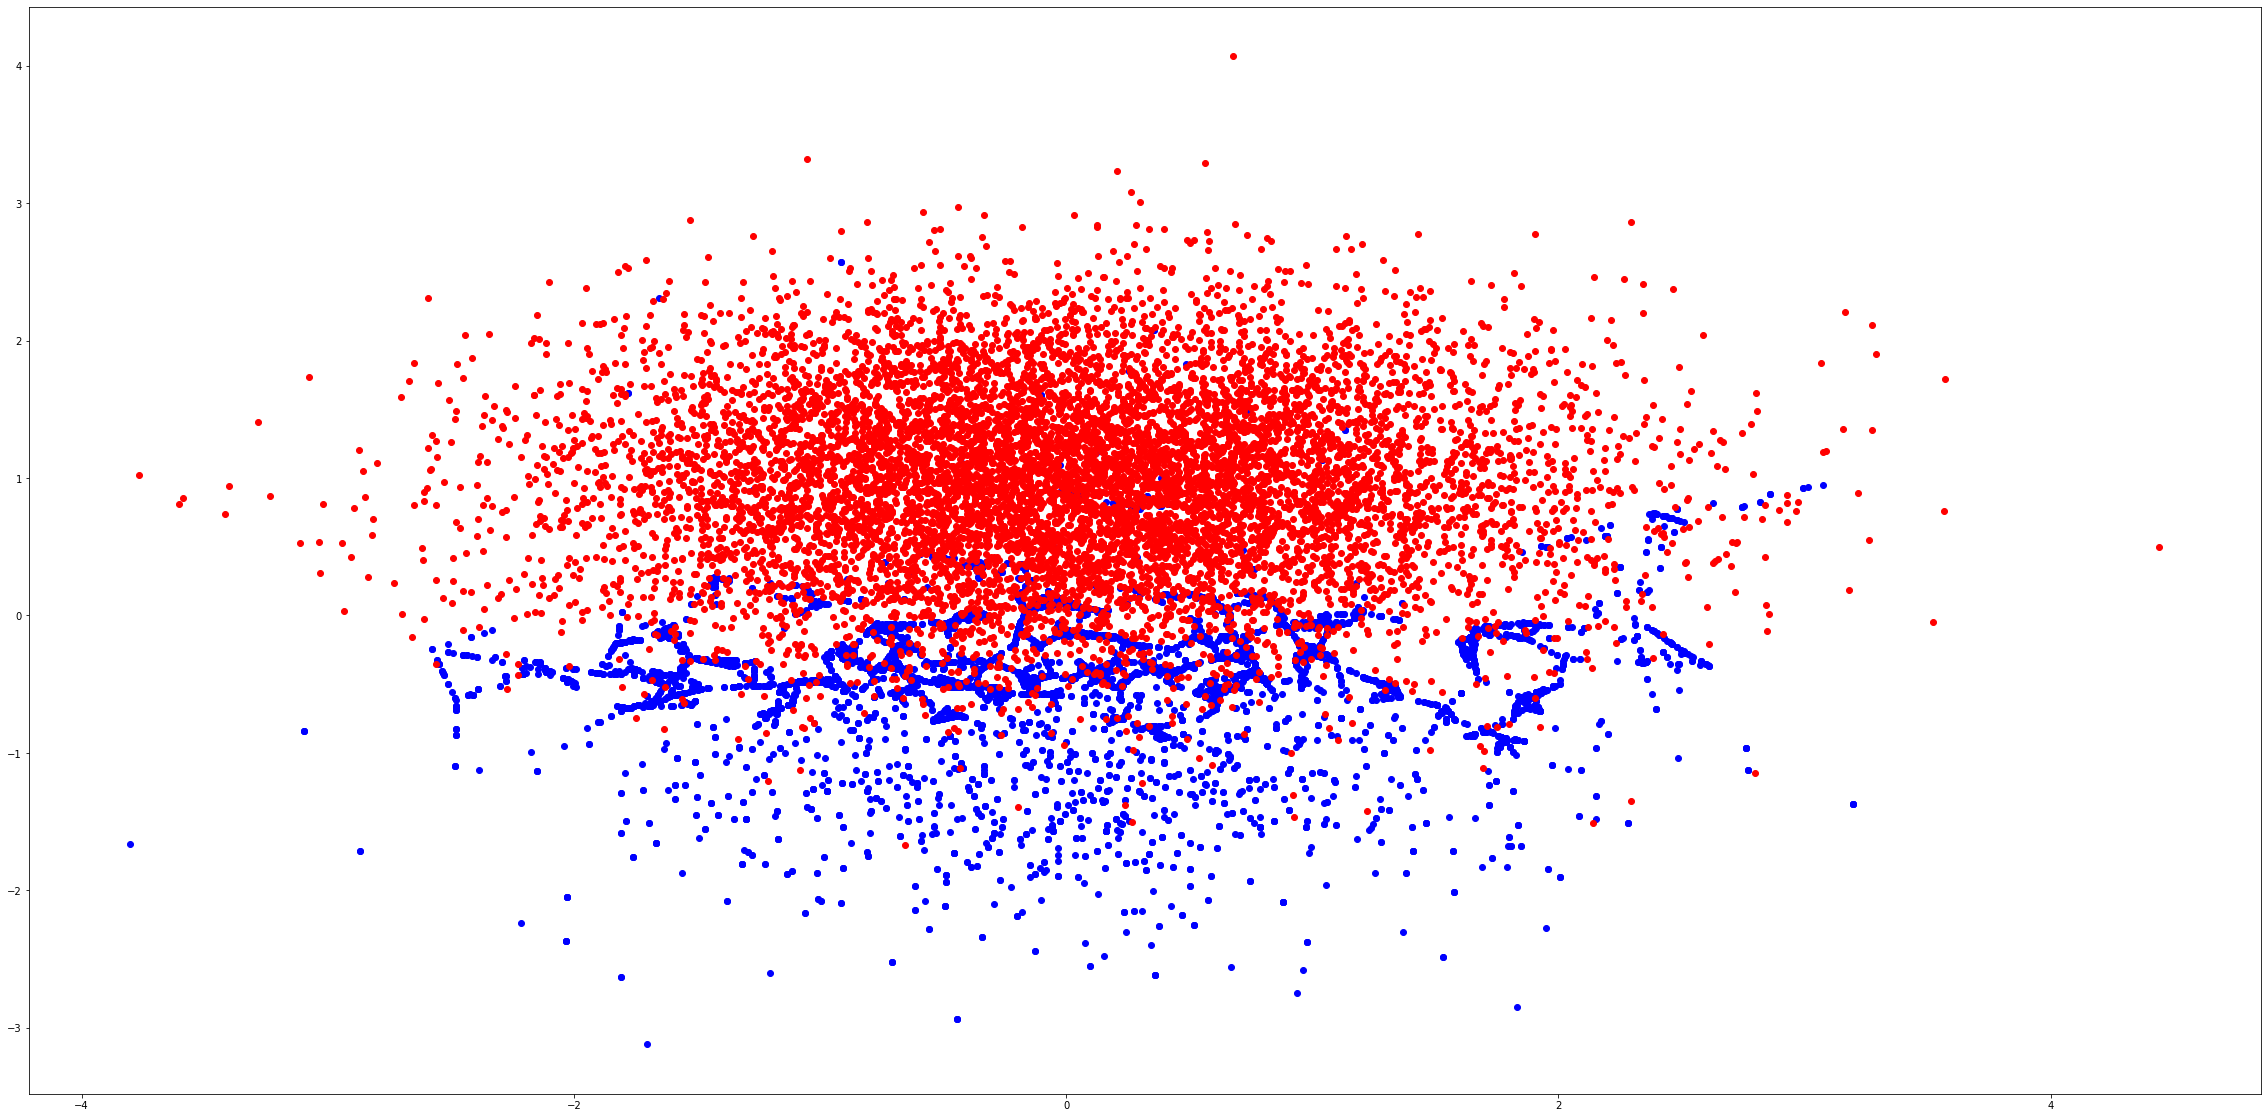

In [107]:
#borderline smote로 정상 클래스의 50%만큼 증강. 그 이후 random over sampling으로 나머지 50%를 증강

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import random
fig, ax = plt.subplots(figsize=(40, 20))
random_ = RandomOverSampler(sampling_strategy=1, random_state=10)
smote = SMOTE( 
    random_state=13)
border_sm = BorderlineSMOTE( 
    sampling_strategy=0.5,
    random_state=13)
X_border, y_border = border_sm.fit_resample(X, y)
X_border_s, y_border_s = random_.fit_resample(X_border, y_border)

cur_x0_cord=[]
cur_y0_cord=[]
cur_x1_cord=[]
cur_y1_cord=[]
seperate(cur_x0_cord, cur_x1_cord, cur_y0_cord, cur_y1_cord, X_border_s, y_border_s)
plt.scatter(cur_x0_cord, cur_y0_cord, c='b')
plt.scatter(cur_x1_cord, cur_y1_cord, c='r')
print(sorted(Counter(y_border_s).items()))
result=0
for item in cur_y0_cord:
  if -1<=item<=0:
    result +=1

print('border item count: ', result)
print('0 class: ', len(cur_y0_cord))

[(0, 8977), (1, 8977)]
border item count:  3647
0 class:  8977


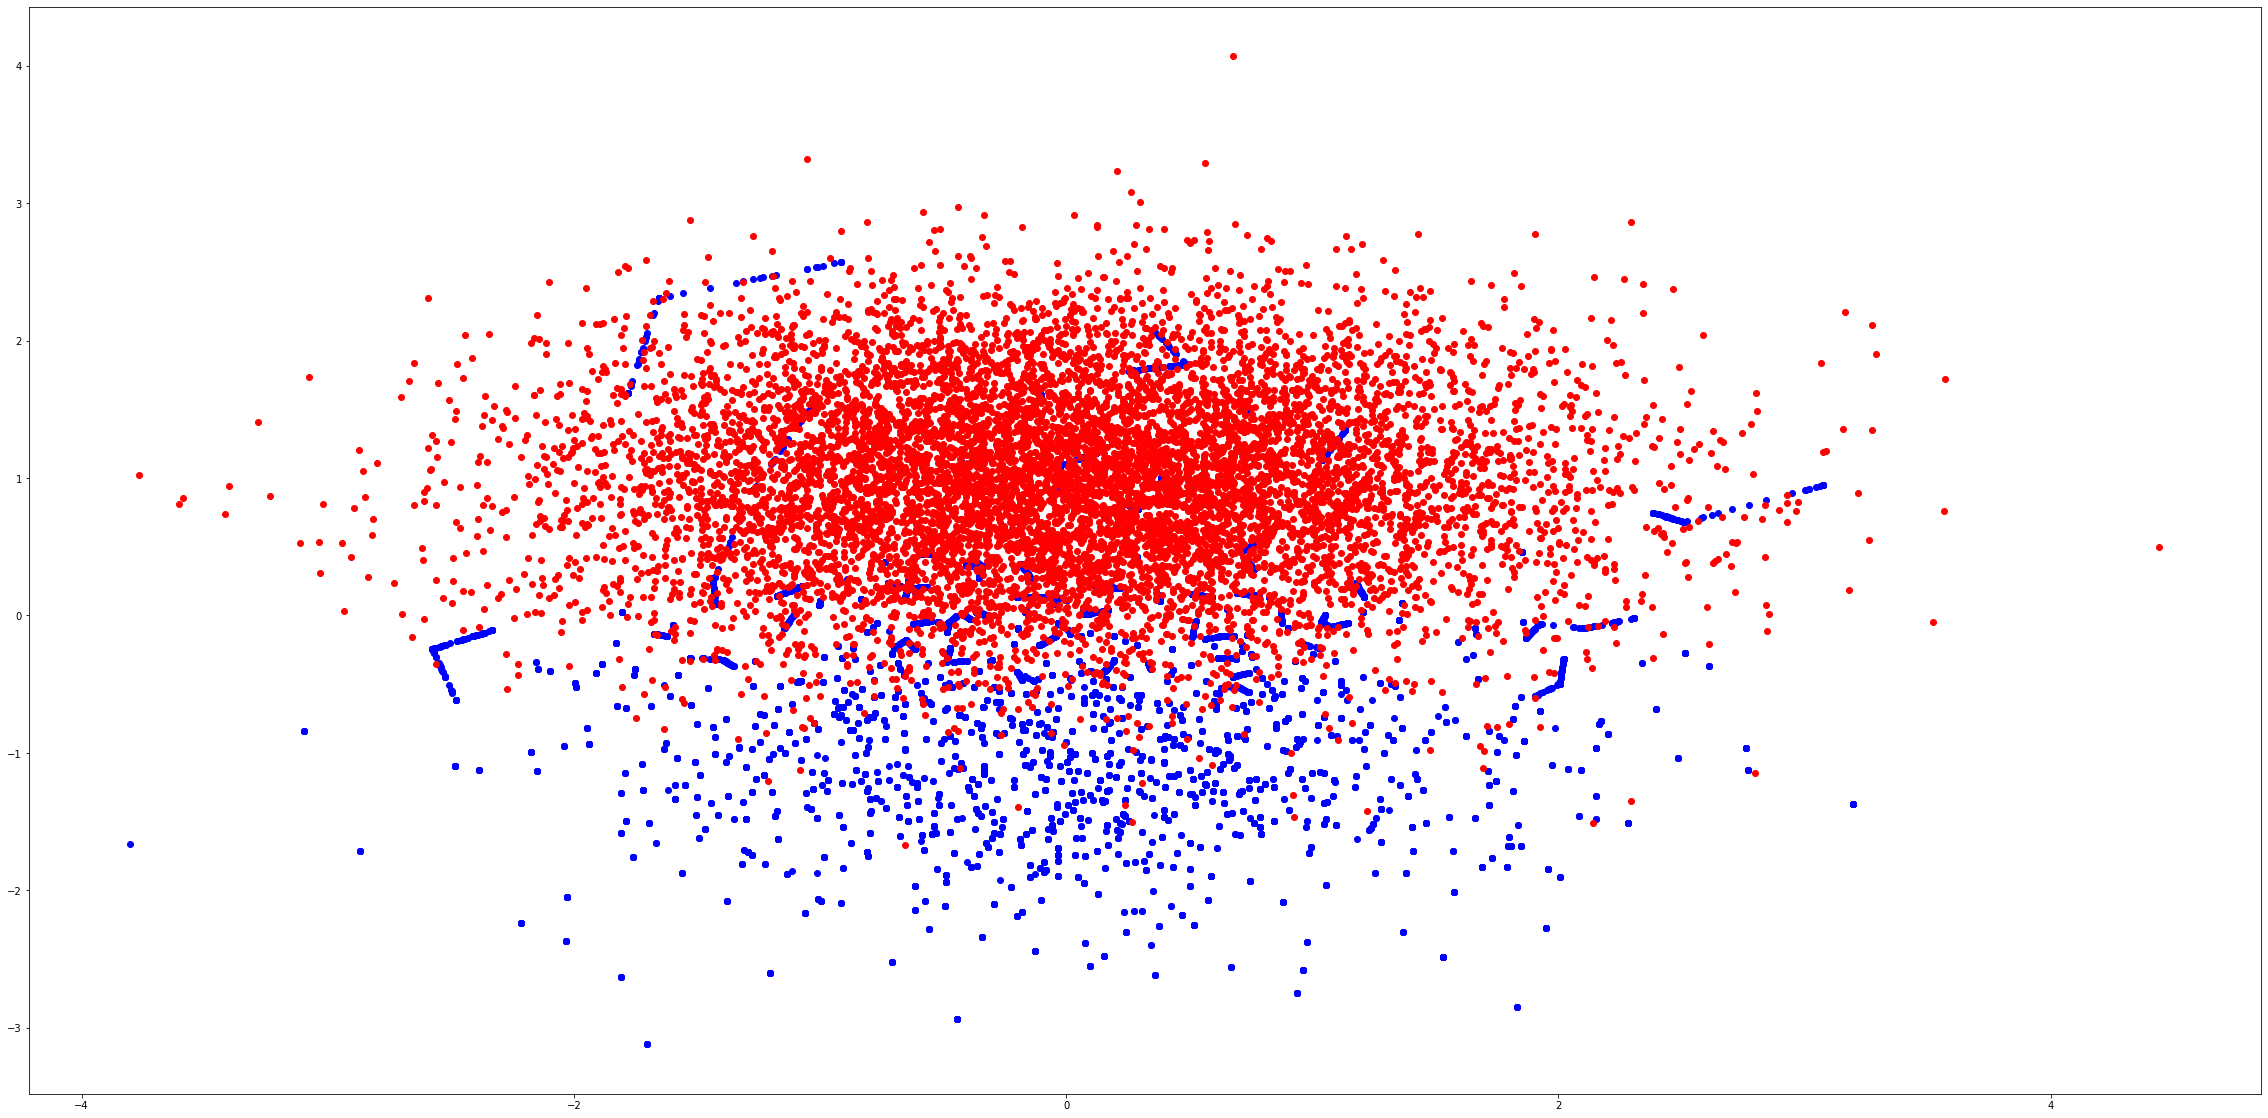

In [108]:
# random over sampling으로 정상 클래스의 50%만큼 증강. 그 이후 borderline smote로 나머지 50%를 증강

fig, ax = plt.subplots(figsize=(40, 20))
random_ = RandomOverSampler(sampling_strategy=0.5, random_state=10)
smote = SMOTE( 
    sampling_strategy=0.5,
    random_state=45)
border_sm = BorderlineSMOTE( 
    random_state=45)
X_s, y_s = random_.fit_resample(X, y)
X_s_border, y_s_border = border_sm.fit_resample(X_s, y_s)

cur_x0_cord=[]
cur_y0_cord=[]
cur_x1_cord=[]
cur_y1_cord=[]
seperate(cur_x0_cord, cur_x1_cord, cur_y0_cord, cur_y1_cord, X_s_border, y_s_border)
plt.scatter(cur_x0_cord, cur_y0_cord, c='b')
plt.scatter(cur_x1_cord, cur_y1_cord, c='r')
print(sorted(Counter(y_s_border).items()))

result=0
for item in cur_y0_cord:
  if -1<=item<=0:
    result +=1

print('border item count: ', result)
print('0 class: ', len(cur_y0_cord))

[(0, 8977), (1, 8977)]
border item count:  3319
0 class:  8977


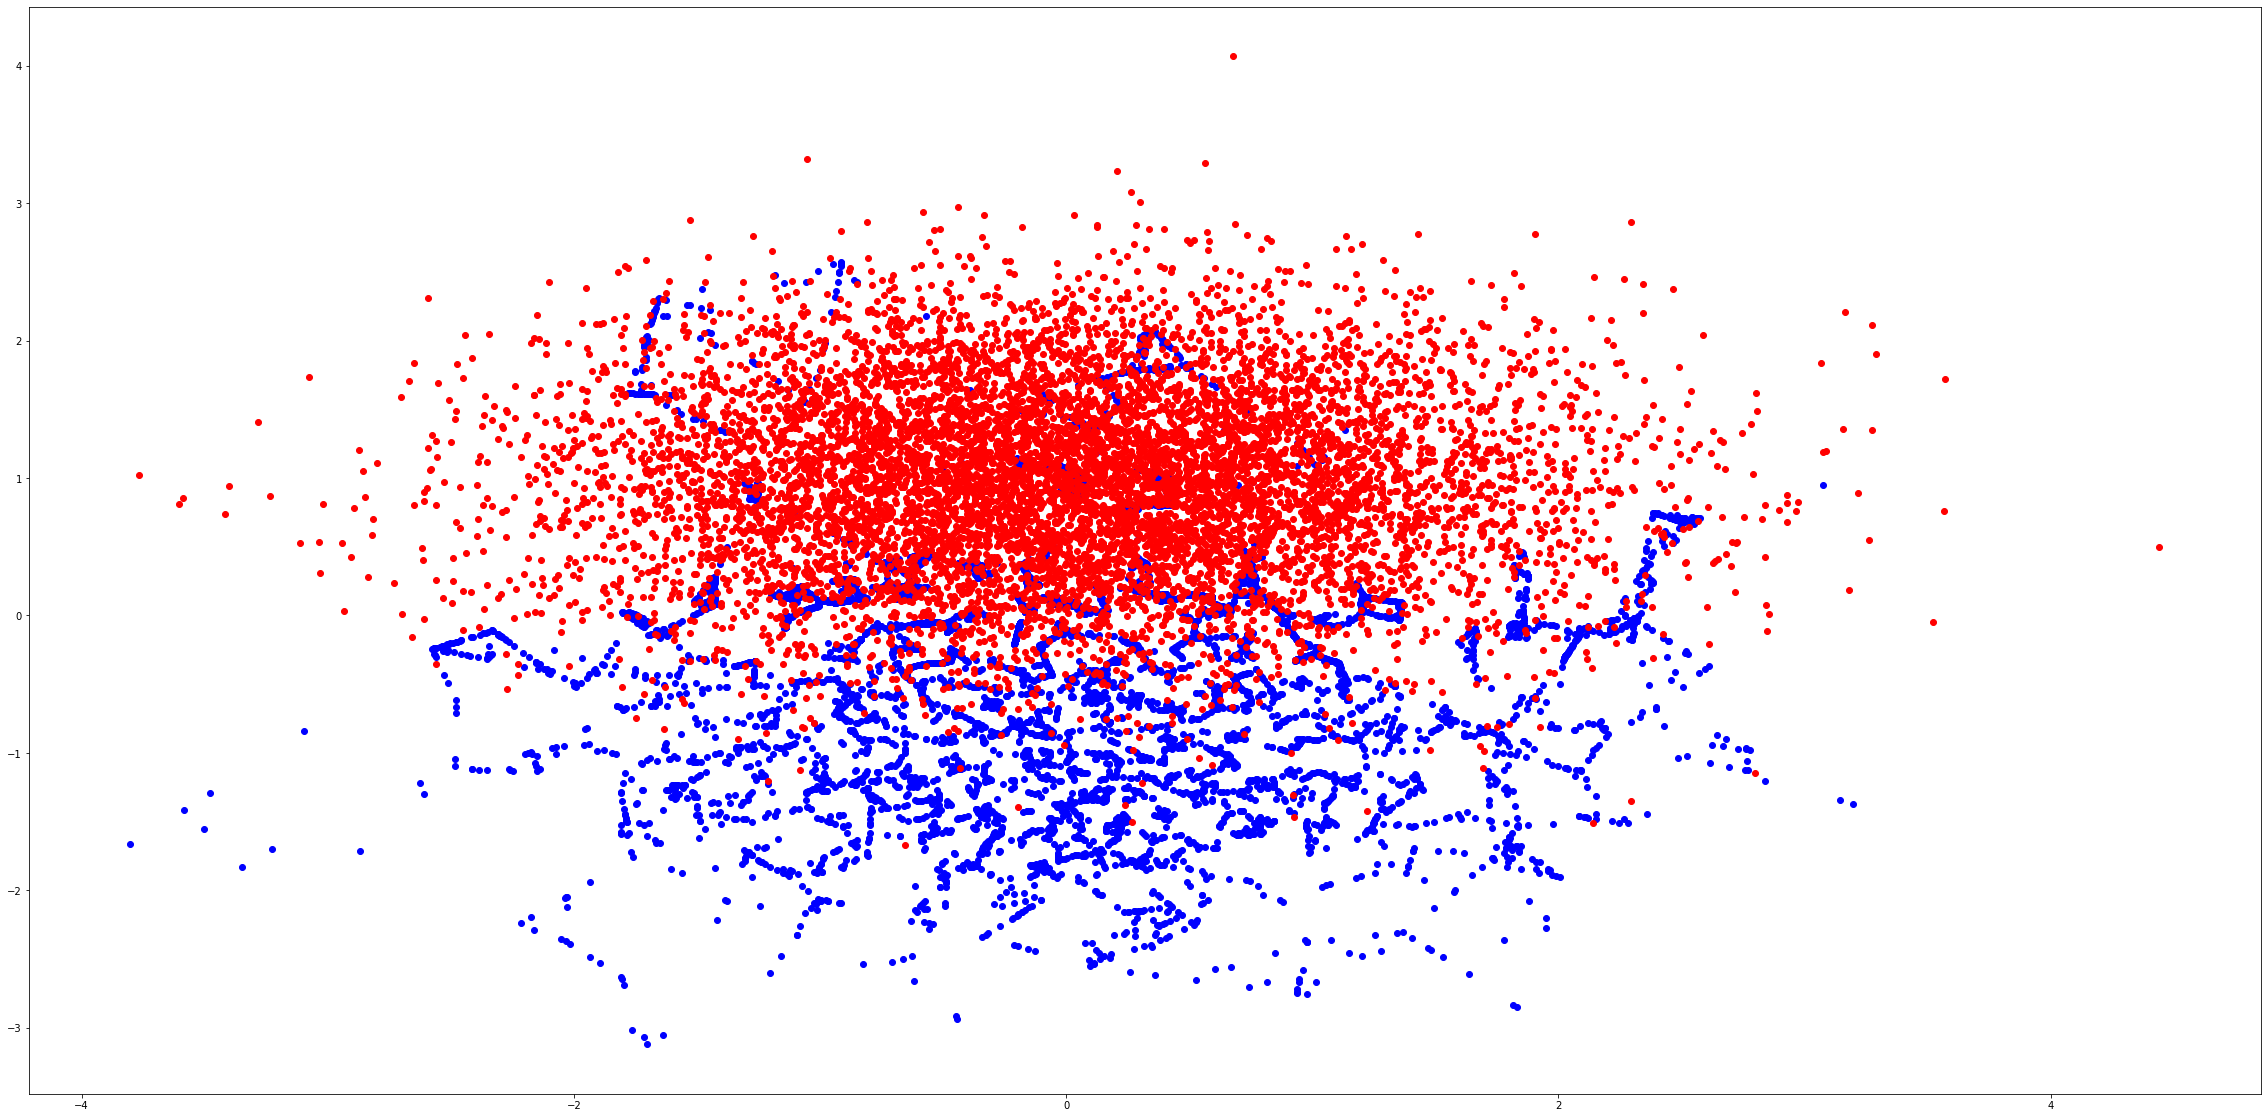

In [109]:
#smote를 통해 정상 클래스의 50%만큼 증강, 그 이후 borderline smote를 이용해 나머지 50%를 증강
fig, ax = plt.subplots(figsize=(40, 20))
random_ = RandomOverSampler(sampling_strategy=0.5, random_state=10)
smote = SMOTE( 
    sampling_strategy=0.5,
    random_state=45)
border_sm = BorderlineSMOTE( 
    random_state=45)
X_s, y_s = smote.fit_resample(X, y)
X_s_border, y_s_border = border_sm.fit_resample(X_s, y_s)

cur_x0_cord=[]
cur_y0_cord=[]
cur_x1_cord=[]
cur_y1_cord=[]
seperate(cur_x0_cord, cur_x1_cord, cur_y0_cord, cur_y1_cord, X_s_border, y_s_border)
plt.scatter(cur_x0_cord, cur_y0_cord, c='b')
plt.scatter(cur_x1_cord, cur_y1_cord, c='r')
print(sorted(Counter(y_s_border).items()))

result=0
for item in cur_y0_cord:
  if -1<=item<=0:
    result +=1

print('border item count: ', result)
print('0 class: ', len(cur_y0_cord))

[(0, 8977), (1, 8977)]
border item count:  6838
0 class:  8977


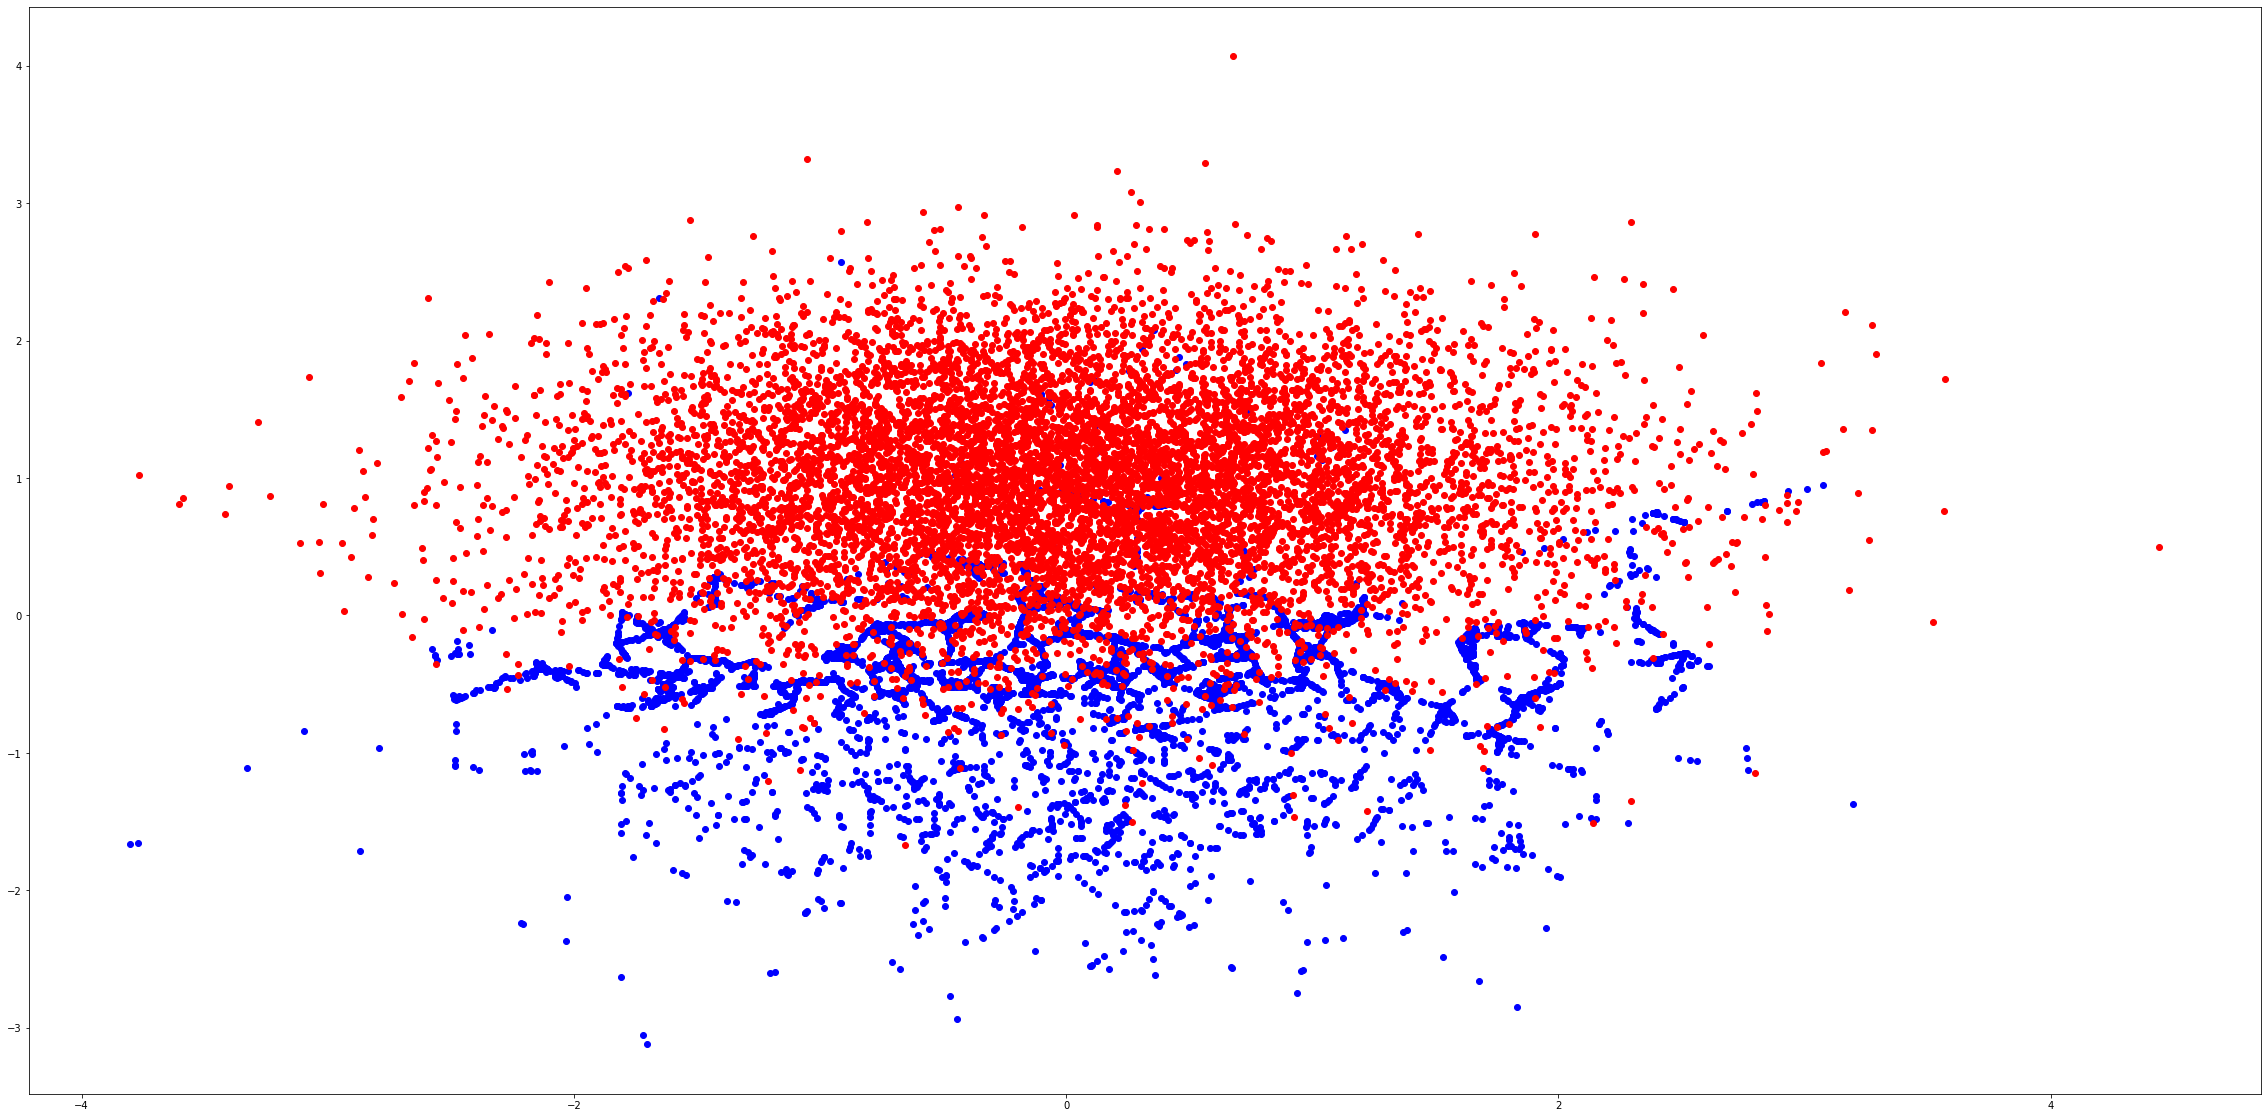

In [110]:
# borderline smote를 통해 정상 클래스의 50%만큼 생성하고, smote를 이용해 나머지 50%를 생성

fig, ax = plt.subplots(figsize=(40, 20))
smote = SMOTE( 
    sampling_strategy=1,
    random_state=45)
border_sm = BorderlineSMOTE(
    sampling_strategy=0.5, 
    random_state=45)
X_border, y_border = border_sm.fit_resample(X, y)
X_border_s, y_border_s = smote.fit_resample(X_border, y_border)

cur_x0_cord=[]
cur_y0_cord=[]
cur_x1_cord=[]
cur_y1_cord=[]
seperate(cur_x0_cord, cur_x1_cord, cur_y0_cord, cur_y1_cord, X_border_s, y_border_s)
plt.scatter(cur_x0_cord, cur_y0_cord, c='b')
plt.scatter(cur_x1_cord, cur_y1_cord, c='r')
print(sorted(Counter(y_border_s).items()))

result=0
for item in cur_y0_cord:
  if -1<=item<=0:
    result +=1

print('border item count: ', result)
print('0 class: ', len(cur_y0_cord))